## Project 2
### Ethan Colley/ebc742
### Part 1

In [117]:
import numpy as np
import pandas as pd
bc=pd.read_csv('BC.csv')

In [118]:
bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [119]:

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


All variables except "deg-malig" will require conversion with one-hot encoding since they are all categorical object variables

In [120]:
bc.shape

(286, 10)

In [121]:
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])

In [122]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [123]:
bc['class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [124]:
bc['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [125]:
bc['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [126]:
bc['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [127]:
bc['inv-nodes'].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [128]:
bc['node-caps'].unique()

array(['no', 'yes'], dtype=object)

In [129]:
bc['breast'].unique()

array(['left', 'right'], dtype=object)

In [130]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

In [131]:
bc['irradiat'].unique()

array(['no', 'yes'], dtype=object)

In [132]:
bc['class'] = bc['class'].astype("category")
bc['menopause'] = bc['menopause'].astype("category")
bc['node-caps'] = bc['node-caps'].astype("category")
bc['breast'] = bc['breast'].astype("category")
bc['breast-quad'] = bc['breast-quad'].astype("category")
bc['irradiat'] = bc['irradiat'].astype("category")
bc['age'] = bc['age'].astype("category")
bc['tumor-size'] = bc['tumor-size'].astype("category")
bc['inv-nodes'] = bc['inv-nodes'].astype("category")

Text(0.5, 0, 'Age')

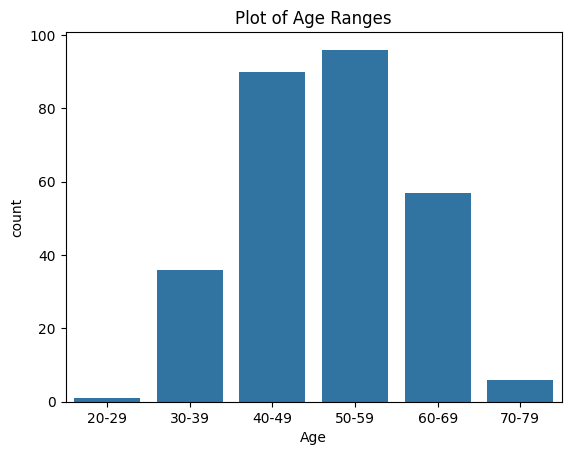

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=bc['age'])
plt.title("Plot of Age Ranges")
plt.xlabel("Age")

This is a mostly normal distribution of age.

Text(0.5, 0, 'Menopause Status')

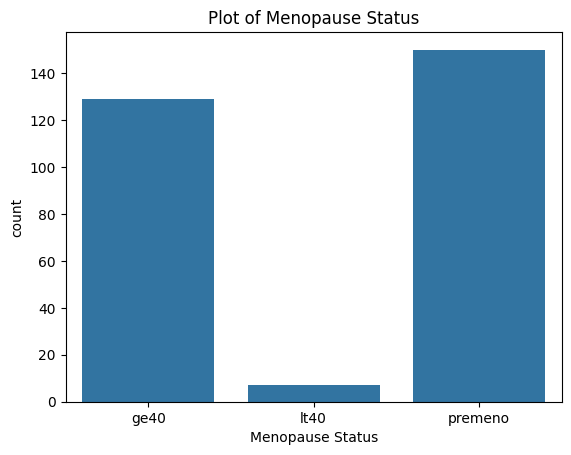

In [134]:
sns.countplot(x=bc['menopause'])
plt.title("Plot of Menopause Status")
plt.xlabel("Menopause Status")

We can see that there are not a lot of lt40 patients in comparison to the other categories which could hurt predictions.

Text(0.5, 0, 'class')

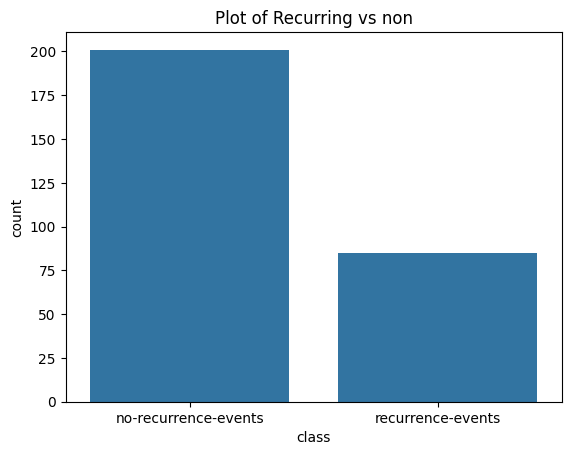

In [135]:
sns.countplot(x=bc['class'])
plt.title("Plot of Recurring vs non")
plt.xlabel("class")

Text(0.5, 0, 'Irradiation Status')

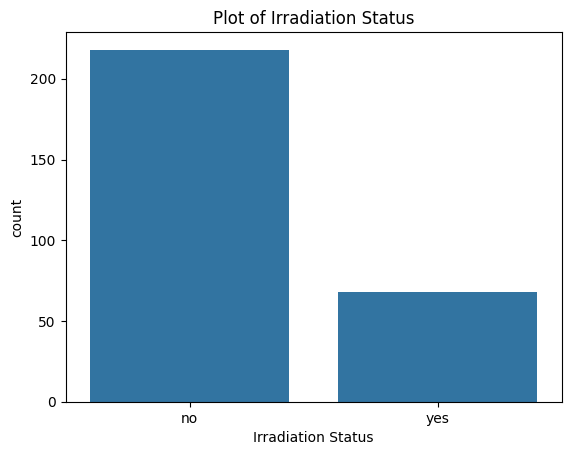

In [136]:
sns.countplot(x=bc['irradiat'])
plt.title("Plot of Irradiation Status")
plt.xlabel("Irradiation Status")

Interestingly the plot of Irradiation status and lot of recurrence events are quite similar.

([<matplotlib.axis.XTick at 0x7f2ec1a13bd0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

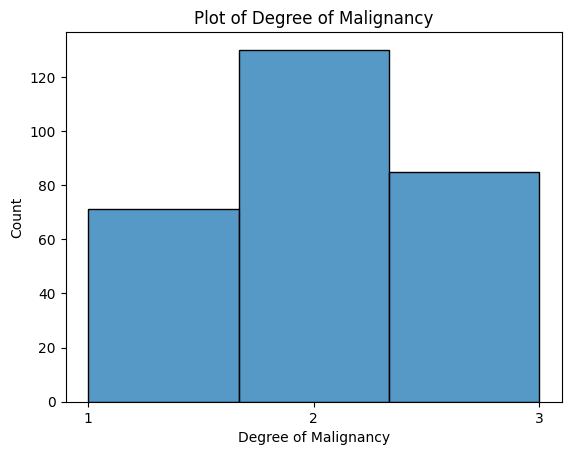

In [137]:
sns.histplot(bc['deg-malig'], bins=3, kde=False)
plt.title("Plot of Degree of Malignancy")
plt.xlabel("Degree of Malignancy")
plt.xticks([1, 2, 3])

Degrees of Malignancy seem to have mostly normal distribution with most cases being degree 2.

In [138]:
bc = pd.get_dummies(bc, columns=["class", 'menopause', 'node-caps','breast','breast-quad','irradiat','age','tumor-size','inv-nodes'], drop_first=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   menopause_lt40           286 non-null    bool 
 3   menopause_premeno        286 non-null    bool 
 4   node-caps_yes            286 non-null    bool 
 5   breast_right             286 non-null    bool 
 6   breast-quad_left_low     286 non-null    bool 
 7   breast-quad_left_up      286 non-null    bool 
 8   breast-quad_right_low    286 non-null    bool 
 9   breast-quad_right_up     286 non-null    bool 
 10  irradiat_yes             286 non-null    bool 
 11  age_30-39                286 non-null    bool 
 12  age_40-49                286 non-null    bool 
 13  age_50-59                286 non-null    bool 
 14  age_60-69                286 non-null    bool 
 15  age_70

## Part 2

In [139]:
from sklearn.model_selection import train_test_split

X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [140]:
X_train.shape

(200, 31)

In [141]:
X_test.shape

(86, 31)

### Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_dt.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_dt.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.78      0.82      0.80        61
        True       0.50      0.44      0.47        25

    accuracy                           0.71        86
   macro avg       0.64      0.63      0.63        86
weighted avg       0.70      0.71      0.70        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       140
        True       1.00      0.93      0.97        60

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



[Text(0.772217607973422, 0.9772727272727273, 'x[3] <= 0.5\ngini = 0.42\nsamples = 200\nvalue = [140, 60]'),
 Text(0.6374584717607974, 0.9318181818181818, 'x[15] <= 0.5\ngini = 0.352\nsamples = 162\nvalue = [125, 37]'),
 Text(0.6241694352159468, 0.8863636363636364, 'x[19] <= 0.5\ngini = 0.385\nsamples = 142\nvalue = [105, 37]'),
 Text(0.5008305647840532, 0.8409090909090909, 'x[10] <= 0.5\ngini = 0.353\nsamples = 118\nvalue = [91, 27]'),
 Text(0.41362126245847175, 0.7954545454545454, 'x[16] <= 0.5\ngini = 0.331\nsamples = 105\nvalue = [83, 22]'),
 Text(0.34551495016611294, 0.75, 'x[1] <= 0.5\ngini = 0.354\nsamples = 87\nvalue = [67, 20]'),
 Text(0.33222591362126247, 0.7045454545454546, 'x[13] <= 0.5\ngini = 0.344\nsamples = 86\nvalue = [67, 19]'),
 Text(0.2757475083056478, 0.6590909090909091, 'x[7] <= 0.5\ngini = 0.317\nsamples = 71\nvalue = [57, 14]'),
 Text(0.26245847176079734, 0.6136363636363636, 'x[0] <= 2.5\ngini = 0.342\nsamples = 64\nvalue = [50, 14]'),
 Text(0.2292358803986711, 0

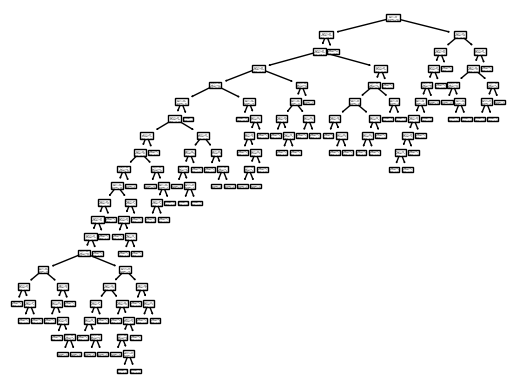

In [143]:
from sklearn import tree
tree.plot_tree(model_dt)

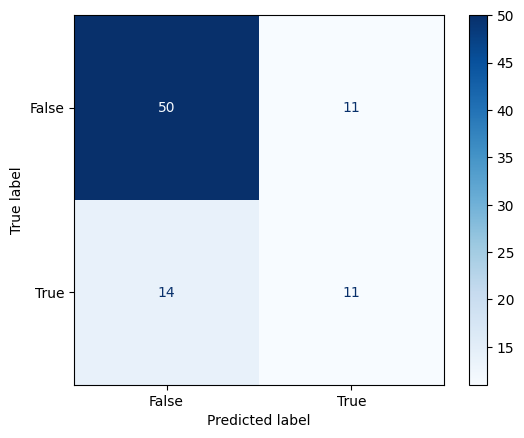

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test,cmap=plt.cm.Blues,normalize=None)

### Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fit the LG model -- random_state is used to shuffle the data; max_iter is max # of iterations for solver to converge (default is 100)
model_lr = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
# print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_lr.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_lr.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.85      0.80        61
        True       0.47      0.32      0.38        25

    accuracy                           0.70        86
   macro avg       0.61      0.59      0.59        86
weighted avg       0.67      0.70      0.68        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.78      0.92      0.85       140
        True       0.69      0.40      0.51        60

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.68       200
weighted avg       0.75      0.77      0.74       200



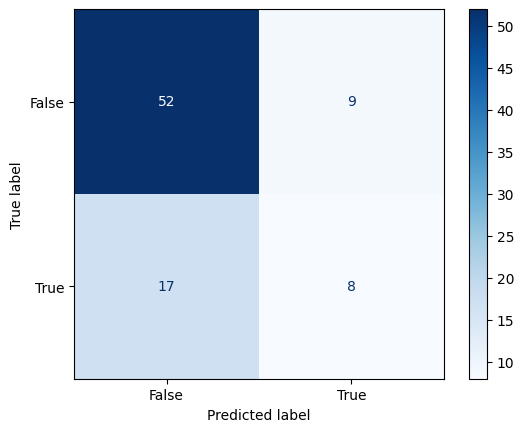

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test,cmap=plt.cm.Blues,normalize=None)

### KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
# Check the accuracy on the test data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.73
Accuracy of knn on train data is : 0.81


### Bonus:Using GridsearchCV to improve Recall

In [149]:
knn_search_accuracy = KNeighborsClassifier()

In [150]:
param_grid = {"n_neighbors": np.arange(1, 100)}

In [151]:
from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [152]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [153]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [154]:
best_knn = knn_gscv.best_estimator_

In [155]:
accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print(f"Accuracy on the test data set for the model produced with the optimal k is: {accuracy_test}")

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of on train data for the model produced with the optimal k is: {:.2}'.format(accuracy_train))

Accuracy on the test data set for the model produced with the optimal k is: 0.7790697674418605
Accuracy of on train data for the model produced with the optimal k is: 0.74


In [156]:
knn_search_recall = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)
knn_gscv2.best_params_

{'n_neighbors': 1}

In [157]:
best_recall = knn_gscv2.best_estimator_

In [158]:
models = [knn, best_knn, best_recall]
for m in models:
    # on test data
    recall_test=recall_score(y_test, m.predict(X_test))
    print(f'Recall of {m} on test data is : {recall_test}')
    # on training data
    recall_train=recall_score(y_train, m.predict(X_train))
    print(f'Recall of {m} on train data is : {recall_train}')

Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.44
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.45
Recall of KNeighborsClassifier(n_neighbors=7) on test data is : 0.36
Recall of KNeighborsClassifier(n_neighbors=7) on train data is : 0.21666666666666667
Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.56
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.95
